<a href="https://colab.research.google.com/github/axceleeee/Plant-Disease-Identification/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
# upload kaggle.json yang didapatkan dari akun kaggle

from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"axcelinsky","key":"927a7fee6da26119ab8d5b0a0fc64281"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
# download dataset dari kaggle

!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:31<00:00, 150MB/s]
100% 2.70G/2.70G [00:31<00:00, 92.3MB/s]


In [6]:
# unzip file

from zipfile import ZipFile
file_name = '/content/new-plant-diseases-dataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# Preprocessing

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
from keras.preprocessing import image
import math, cv2, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [8]:
train_dataset_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
test_dataset_path = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [9]:
# data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
final_size = (224, 224)
final_batch = 32

In [11]:
training_set = train_datagen.flow_from_directory(train_dataset_path,
                                                 target_size = final_size,
                                                 batch_size = final_batch,
                                                 class_mode = 'categorical')

Found 70295 images belonging to 38 classes.


In [12]:
test_set = test_datagen.flow_from_directory(test_dataset_path,
                                                 target_size = final_size,
                                                 batch_size = final_batch,
                                                 class_mode = 'categorical')

Found 17572 images belonging to 38 classes.


# Build Model

In [13]:
# arsitektur model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3), padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same',strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same',strides=(1,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
from tensorflow.keras.optimizers import Adam

opt = Adam(
    learning_rate=0.001,
    #momentum=0.9
)


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']
)

In [16]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,298,662 (104.14 MB)

 Trainable params: 27,298,662 (104.14 MB)

 Non-trainable params: 0 (0.00 B)

None


# Adding Tweaks

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=4,
)

# Fitting

In [18]:
num_epochs = 5
history = model.fit(training_set,
                      epochs=num_epochs,
                      validation_data = test_set,
                      verbose=2,
                      steps_per_epoch = len(training_set),
                      validation_steps = len(test_set),
                      callbacks = early_stop)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2197/2197 - 908s - 413ms/step - accuracy: 0.6513 - loss: 1.1533 - val_accuracy: 0.8599 - val_loss: 0.4206
Epoch 2/5
2197/2197 - 868s - 395ms/step - accuracy: 0.8936 - loss: 0.3228 - val_accuracy: 0.9124 - val_loss: 0.2584
Epoch 3/5
2197/2197 - 933s - 424ms/step - accuracy: 0.9263 - loss: 0.2206 - val_accuracy: 0.9280 - val_loss: 0.2162
Epoch 4/5
2197/2197 - 871s - 397ms/step - accuracy: 0.9442 - loss: 0.1689 - val_accuracy: 0.9182 - val_loss: 0.2593
Epoch 5/5
2197/2197 - 882s - 402ms/step - accuracy: 0.9515 - loss: 0.1451 - val_accuracy: 0.9313 - val_loss: 0.2107


# Visualisasi

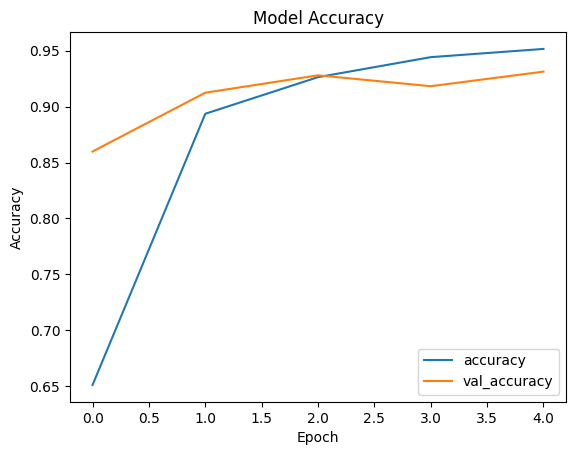

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

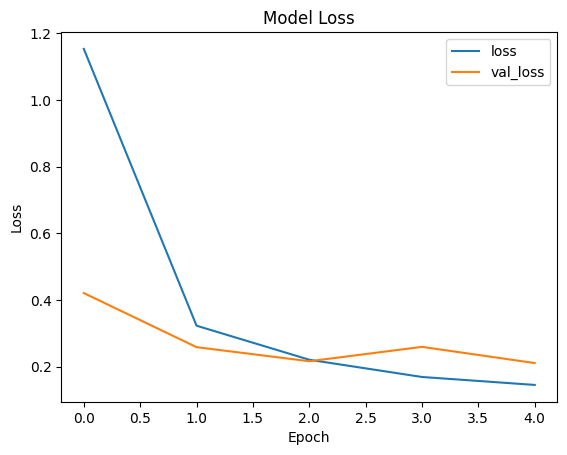

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

# Prediksi

In [21]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step


In [22]:
y_pred

array([[7.3274503e-12, 3.4724360e-07, 1.2892671e-14, ..., 1.8947207e-23,
        7.7048369e-19, 3.4511103e-23],
       [3.7893303e-11, 2.6038855e-14, 1.6176477e-09, ..., 1.4734079e-20,
        2.0480289e-20, 7.6384607e-13],
       [3.0328579e-10, 1.6595456e-08, 4.5306177e-08, ..., 7.3906712e-09,
        9.9845815e-01, 2.1079059e-04],
       ...,
       [1.0578717e-04, 6.1857079e-08, 1.7376615e-05, ..., 8.8555241e-10,
        7.1824691e-10, 2.8572955e-09],
       [3.3431272e-07, 2.0265196e-19, 2.0269375e-11, ..., 8.5595895e-09,
        4.4876526e-07, 1.8851743e-07],
       [5.8619004e-05, 5.9806535e-12, 7.5973441e-09, ..., 5.9979294e-07,
        3.9703373e-05, 5.4522161e-07]], dtype=float32)

In [23]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([18,  8, 36, ..., 16, 31, 31])

# Upload Gambar

In [28]:
uploaded = files.upload()

for fn in uploaded.keys():

      img_path = fn
      img = image.load_img(img_path, target_size=(224, 224))

      # Preprocessing image
      x = image.img_to_array(img)

      # Scaling
      x = x/255
      x = np.expand_dims(x, axis=0)


      preds = model.predict(x)
      preds=np.argmax(preds, axis=1)

      if preds==0: #Apple___Apple_scab
          preds="Tanamanmu terkena penyakit Apple Scab"
      elif preds==1: #Apple___Black_rot
          preds="Tanamanmu terkena penyakit Black Rot"
      elif preds==2: #Apple___Cedar_apple_rust
          preds="Tanamanmu terkena penyakit Cedar Apple Rust"
      elif preds==5: #Cherry_(including_sour)___Powdery_mildew
          preds="Tanamanmu terkena penyakit Powdery Mildew"
      elif preds==7: #Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
          preds="Tanamanmu terkena penyakit Cercospora Leaf Spot Gray Leaf Spot"
      elif preds==8: #8 Corn_(maize)___Common_rust_
          preds="Tanamanmu terkena penyakit Common Rust"
      elif preds==9: #9 Corn_(maize)___Northern_Leaf_Blight
          preds="Tanamanmu terkena penyakit Northern Leaf Blight"
      elif preds==11: #Grape___Black_rot
          preds="Tanamanmu terkena penyakit Black Rot"
      elif preds==12: #Grape___Esca_(Black_Measles)
          preds="Tanamanmu terkena penyakit Esca (Black Measles)"
      elif preds==13: #Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
          preds="Tanamanmu terkena penyakit Leaf blight (Isariopsis Leaf Spot)"
      elif preds==15: #Orange___Haunglongbing_(Citrus_greening)
          preds="Tanamanmu terkena penyakit Haunglongbing (Citrus greening)"
      elif preds==16: #Peach___Bacterial_spot
          preds="Tanamanmu terkena penyakit Bacterial Spot"
      elif preds==18: #18 Pepper,_bell___Bacterial_spot
          preds="Tanamanmu terkena penyakit bell Bacterial spot"
      elif preds==20: #20 Potato___Early_blight
          preds="Tanamanmu terkena penyakit Early blight"
      elif preds==21: #21 Potato___Late_blight
          preds="Tanamanmu terkena penyakit Late blight"
      elif preds==25: #25 Squash___Powdery_mildew
          preds="Tanamanmu terkena penyakit Powdery Mildew"
      elif preds==26: #26 Strawberry___Leaf_scorch
          preds="Tanamanmu terkena penyakit Leaf scorch"
      elif preds==28: #28 Tomato___Bacterial_spot
          preds="Tanamanmu terkena penyakit Bacterial spot "
      elif preds==29: #29 Tomato___Early_blight
          preds="Tanamanmu terkena penyakit Early_blight"
      elif preds==30: #30 Tomato___Late_blight
          preds="Tanamanmu terkena penyakit Late blight"
      elif preds==31: #31 Tomato___Leaf_Mold
          preds="Tanamanmu terkena penyakit Leaf Mold"
      elif preds==32: #32 Tomato___Septoria_leaf_spot
          preds="Tanamanmu terkena penyakit Septoria Leaf Spot"
      elif preds==33: #33 Tomato___Spider_mites Two-spotted_spider_mite
          preds="Tanamanmu terkena penyakit Spider mites Two-spotted spider mite"
      elif preds==34: #34 Tomato___Target_Spot
          preds="Tanamanmu terkena penyakit Target_Spot"
      elif preds==35: #35 Tomato___Tomato_Yellow_Leaf_Curl_Virus
          preds="Tanamanmu terkena penyakit Tomato Yellow Leaf Curl Virus"
      elif preds==36: #36 Tomato___Tomato_mosaic_virus
          preds="Tanamanmu terkena penyakit Tomato mosaic virus"
      else:
          preds="Yes tanamanmu sehat, pertahankan ^_^"


      print(preds)

Saving Coffee-leaf-rust-upper-leaf-surface-rotated-2-620x438.jpg to Coffee-leaf-rust-upper-leaf-surface-rotated-2-620x438.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Tanamanmu terkena penyakit Bacterial Spot


# Save Model

In [25]:
model.save_weights('model_plant_disease_weights.weights.h5')

In [26]:
# save ke json

model_json = model.to_json()
with open('model_plant_disease_1.json', 'w') as json_file:
    json_file.write(model_json)

In [27]:
# save ke h5 file
from tensorflow.keras.models import load_model

model.save('model_plant_disease.h5')